In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pp

import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Carga de los datos en un DataFrame

In [4]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Determinamos si los datos están correlacionados o no
Es importante tomar en cuenta que si existe una correlación (positiva o negativa) fuerte entre dos variables, es probable que la variable dependiente no me provee información de gran utilidad para entrenar mi red neuronal.

<AxesSubplot:>

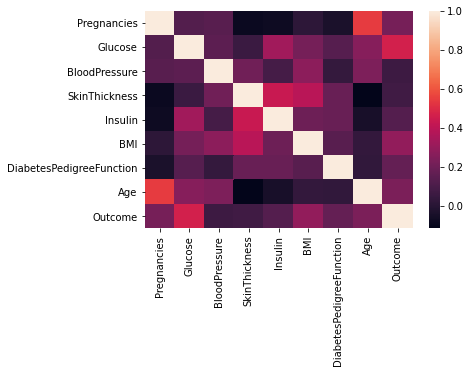

In [7]:
correlacion = data.corr()
sns.heatmap(correlacion, xticklabels = correlacion.columns.values, yticklabels = correlacion.columns.values)

In [9]:
data['SkinThickness'].corr(data['Pregnancies'])

-0.08167177444900707

In [12]:
data['Age'].corr(data['Pregnancies'])

0.54434122840234

Si determinamos que existe una correlación fuerte entre dos o más variables, podemos probar quitando una de las variables (dependiente) del conjunto de datos y ver el efecto que tiene en la red neuronal.

# Normalización de los datos

In [15]:
X = data.iloc[:,0:8]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


## Normalización de datos en base a una escala (rango)

In [17]:
minMaxScaler = MinMaxScaler(feature_range = (-1,1))
X_MinMax = minMaxScaler.fit_transform(X)
X_MinMax

array([[-0.29411765,  0.48743719,  0.18032787, ...,  0.00149031,
        -0.53116994, -0.03333333],
       [-0.88235294, -0.14572864,  0.08196721, ..., -0.2071535 ,
        -0.76686593, -0.66666667],
       [-0.05882353,  0.83919598,  0.04918033, ..., -0.30551416,
        -0.49274125, -0.63333333],
       ...,
       [-0.41176471,  0.2160804 ,  0.18032787, ..., -0.21907601,
        -0.85738685, -0.7       ],
       [-0.88235294,  0.26633166, -0.01639344, ..., -0.10283159,
        -0.76857387, -0.13333333],
       [-0.88235294, -0.06532663,  0.14754098, ..., -0.09388972,
        -0.79760888, -0.93333333]])

In [19]:
standardScaler = StandardScaler()
X_Standard = standardScaler.fit_transform(X)
X_Standard

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

## Ejemplo para obtener Hot Encoding

In [22]:
dh = pd.get_dummies(data.Outcome, prefix = 'Class')
dh

,Class_0,Class_1
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
763,1,0
764,1,0
765,1,0
766,0,1


## División del Corpus en Entrenamiento (Train) y Pruebas (Test)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_Standard, data.Outcome, test_size = 0.2,
                                                    stratify = data.Outcome, random_state = 773)

# Creación de una Red Neuronal usando KERAS

In [24]:
model = Sequential()
model.add(Dense(8, activation = 'relu', input_shape = (8, )))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

## Compilación y entrenamiento de la red neuronal SEQUENTIAL

In [25]:
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
historial = model.fit(X_train, y_train, epochs = 100, batch_size = 1, verbose = 1)

Epoch 1/100
614/614 [==============================] - 1s 2ms/step - loss: 0.5725 - accuracy: 0.6612
Epoch 2/100
614/614 [==============================] - 1s 2ms/step - loss: 0.5110 - accuracy: 0.7150
Epoch 3/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4910 - accuracy: 0.7492
Epoch 4/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4796 - accuracy: 0.7687
Epoch 5/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4718 - accuracy: 0.7769
Epoch 6/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4623 - accuracy: 0.7834
Epoch 7/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4613 - accuracy: 0.7818
Epoch 8/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4569 - accuracy: 0.7769
Epoch 9/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4463 - accuracy: 0.7915
Epoch 10/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4481 - accura

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


## Visualizamos la curva de entrenamiento

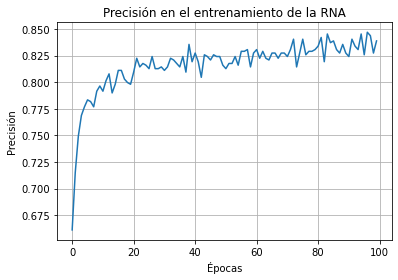

In [30]:
pp.plot(historial.history['accuracy'])
pp.title('Precisión en el entrenamiento de la RNA')
pp.ylabel('Precisión')
pp.xlabel('Épocas')
pp.grid(True)
pp.show()

## Comparación de Entrenamiento vs Validación (Train vs Test)

In [37]:
model = Sequential()
model.add(Dense(8, activation = 'relu', input_shape = (8, )))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
historial = model.fit(X_Standard, data.Outcome, validation_split = 0.2, 
                      epochs = 100, batch_size = 1, verbose = 1)

Epoch 1/100
614/614 [==============================] - 1s 2ms/step - loss: 0.5530 - accuracy: 0.7329 - val_loss: 0.5382 - val_accuracy: 0.7532
Epoch 2/100
614/614 [==============================] - 1s 2ms/step - loss: 0.5047 - accuracy: 0.7573 - val_loss: 0.5173 - val_accuracy: 0.7468
Epoch 3/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4893 - accuracy: 0.7769 - val_loss: 0.5129 - val_accuracy: 0.7532
Epoch 4/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4761 - accuracy: 0.7785 - val_loss: 0.5021 - val_accuracy: 0.7662
Epoch 5/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4735 - accuracy: 0.7655 - val_loss: 0.5125 - val_accuracy: 0.7597
Epoch 6/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4679 - accuracy: 0.7785 - val_loss: 0.5127 - val_accuracy: 0.7597
Epoch 7/100
614/614 [==============================] - 1s 2ms/step - loss: 0.4616 - accuracy: 0.7850 - val_loss: 0.5370 - val_accuracy: 0.7468

Epoch 58/100
614/614 [==============================] - 1s 2ms/step - loss: 0.3713 - accuracy: 0.8306 - val_loss: 0.5038 - val_accuracy: 0.7662
Epoch 59/100
614/614 [==============================] - 1s 2ms/step - loss: 0.3768 - accuracy: 0.8176 - val_loss: 0.4832 - val_accuracy: 0.7662
Epoch 60/100
614/614 [==============================] - 1s 2ms/step - loss: 0.3798 - accuracy: 0.8176 - val_loss: 0.4924 - val_accuracy: 0.7468
Epoch 61/100
614/614 [==============================] - 1s 2ms/step - loss: 0.3771 - accuracy: 0.8160 - val_loss: 0.5387 - val_accuracy: 0.7532
Epoch 62/100
614/614 [==============================] - 1s 2ms/step - loss: 0.3768 - accuracy: 0.8225 - val_loss: 0.4967 - val_accuracy: 0.7922
Epoch 63/100
614/614 [==============================] - 1s 2ms/step - loss: 0.3751 - accuracy: 0.8127 - val_loss: 0.5245 - val_accuracy: 0.7532
Epoch 64/100
614/614 [==============================] - 1s 2ms/step - loss: 0.3799 - accuracy: 0.8241 - val_loss: 0.5053 - val_accuracy:

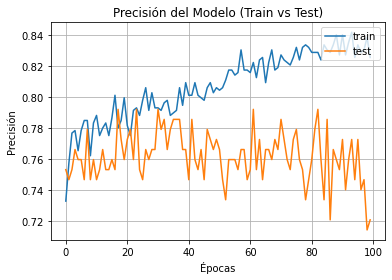

In [38]:
pp.plot(historial.history['accuracy'])
pp.plot(historial.history['val_accuracy'])
pp.title('Precisión del Modelo (Train vs Test)')
pp.ylabel('Precisión')
pp.xlabel('Épocas')
pp.legend(['train','test'], loc = 'upper right')
pp.grid(True)
pp.show()